# Supervised Learning - Foundations: ReCell 

***Marks: 60***

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%reload_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
# loading data
df = pd.read_csv("used_device_data.csv")
df.head(5)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64


<IPython.core.display.Javascript object>

In [3]:
# checking shape
df.shape

(3454, 15)

<IPython.core.display.Javascript object>

In [4]:
# checking the column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


<IPython.core.display.Javascript object>

In [5]:
# checking for missing values in the data
df.isnull().sum().sort_values(ascending=False)

main_camera_mp      179
weight                7
battery               6
int_memory            4
ram                   4
selfie_camera_mp      2
brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

In [6]:
# checking for duplicate values
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the price of a used device?

In [7]:
# checking the statistical summary of the data
df.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,237.038848,92.302936
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,194.302782,54.701648
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,18.200000,4.650000
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,120.342500,56.482500
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,189.785000,81.870000
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,291.115000,116.245000
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,2560.200000,749.520000


<IPython.core.display.Javascript object>

### Univariate Analysis

In [8]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [9]:
df.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'new_price', 'used_price'],
      dtype='object')

<IPython.core.display.Javascript object>

### Screen_size

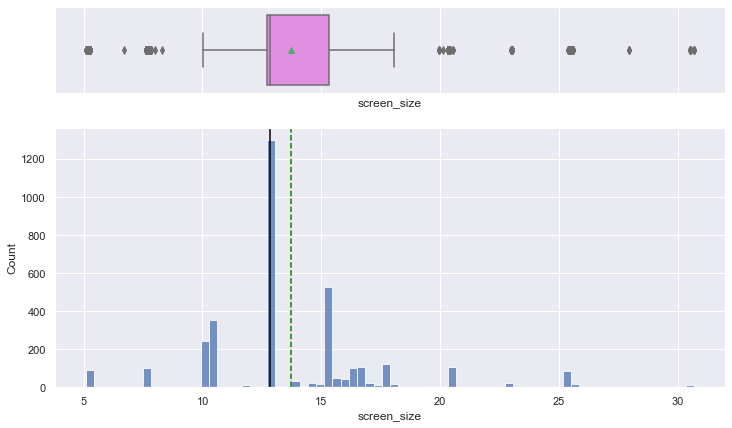

<IPython.core.display.Javascript object>

In [10]:
histogram_boxplot(df, "screen_size")

### Observations: 
- The distribution is right skewed.

### Main_camera_mp

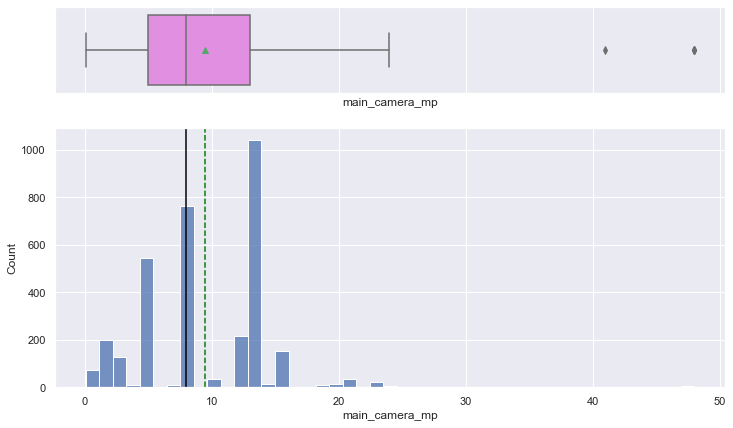

<IPython.core.display.Javascript object>

In [11]:
histogram_boxplot(df, "main_camera_mp")

### Observations: 
- The distribution is right skewed.

### selfie_camera_mp

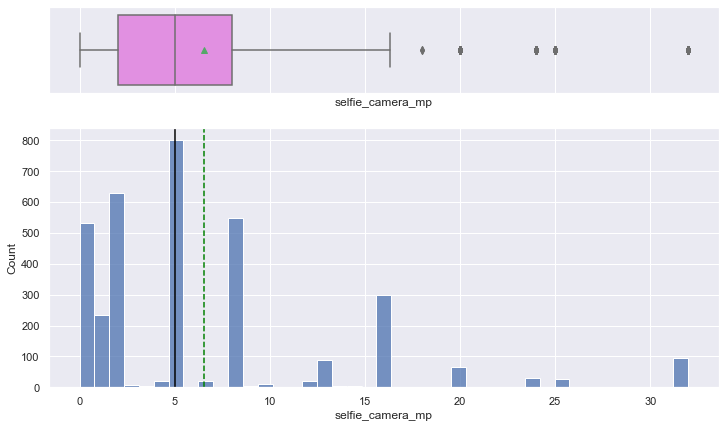

<IPython.core.display.Javascript object>

In [12]:
histogram_boxplot(df, "selfie_camera_mp")

### Observations: 
- The distribution is right skewed.

### int_memory

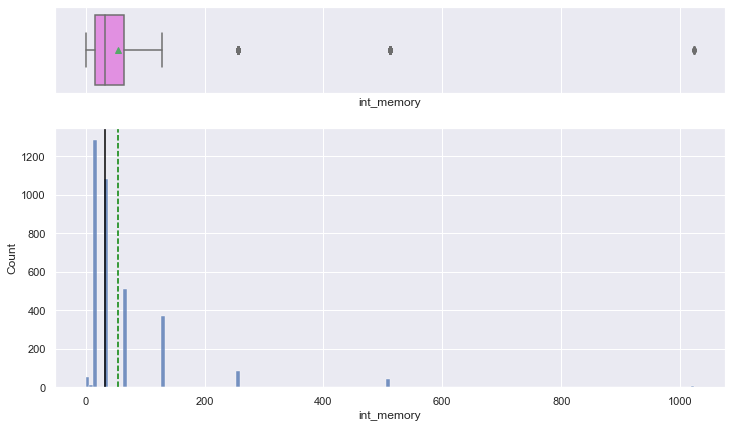

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(df, "int_memory")

### Observations: 
- The distribution is heavily right skewed.

### ram

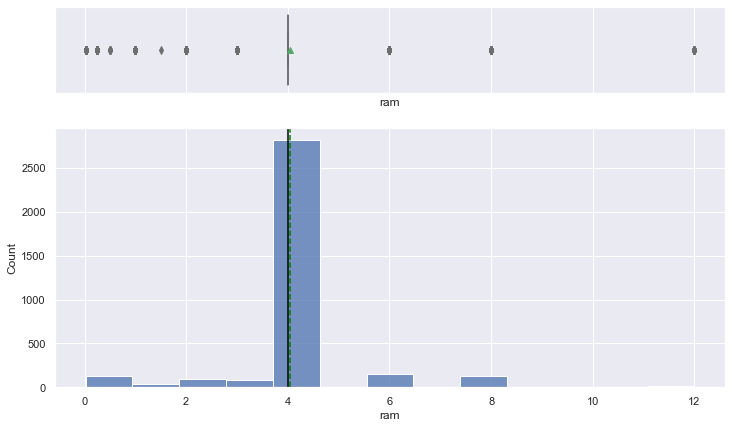

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(df, "ram")

### Observations: 
- The distribution is not uniform and most of the values are concentrated on 4.

  ### battery

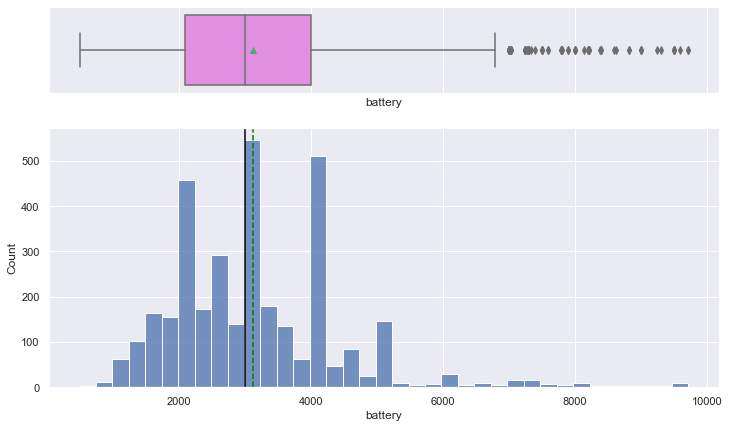

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(df, "battery")

### Observations: 
- The distribution is right skewed.

### weight

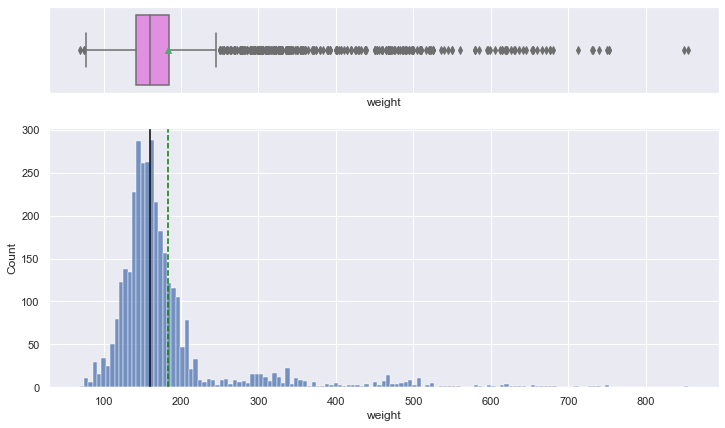

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(df, "weight")

### Observations: 
- The distribution is right skewed.

### days used

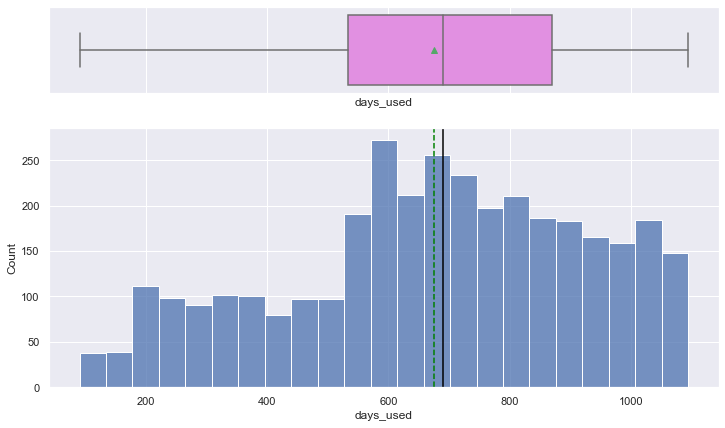

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(df, "days_used")

### Observations: 
- The distribution is left skewed.

### used price

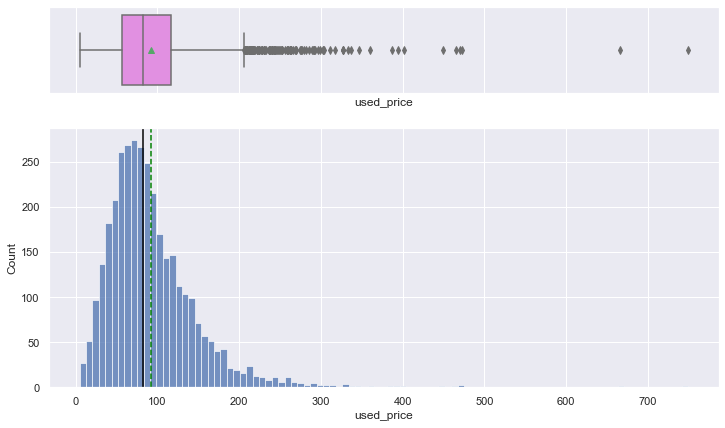

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, "used_price")

### Observations: 
- The distribution is right skewed.

In [19]:
df["used_price_log"] = np.log(df["used_price"])

<IPython.core.display.Javascript object>

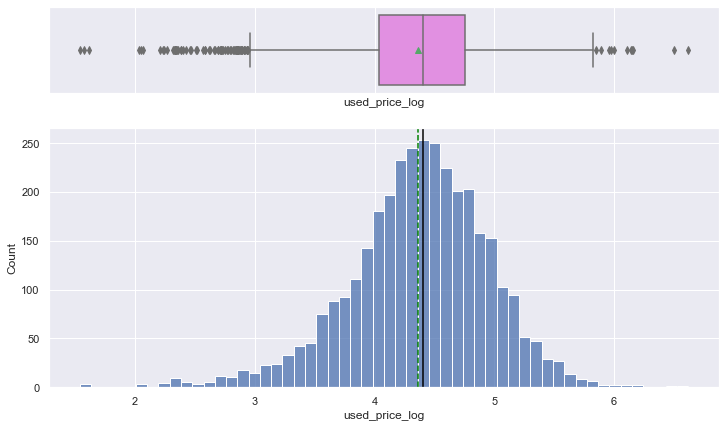

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(df, "used_price_log")

### new price

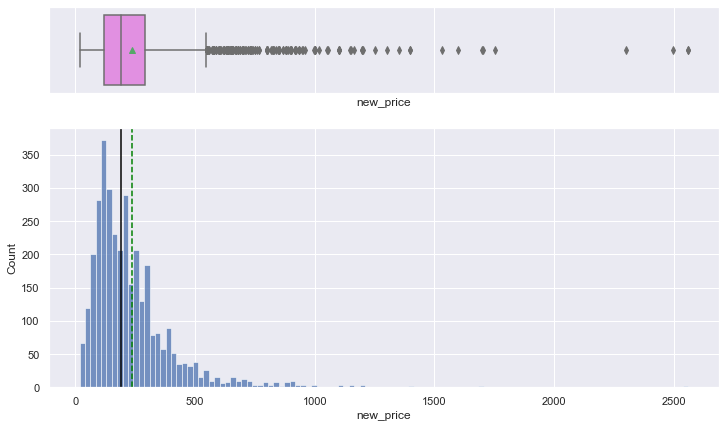

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, "new_price")

### Observations: 
- The distribution is right skewed.

In [22]:
df["new_price_log"] = np.log(df["new_price"])

<IPython.core.display.Javascript object>

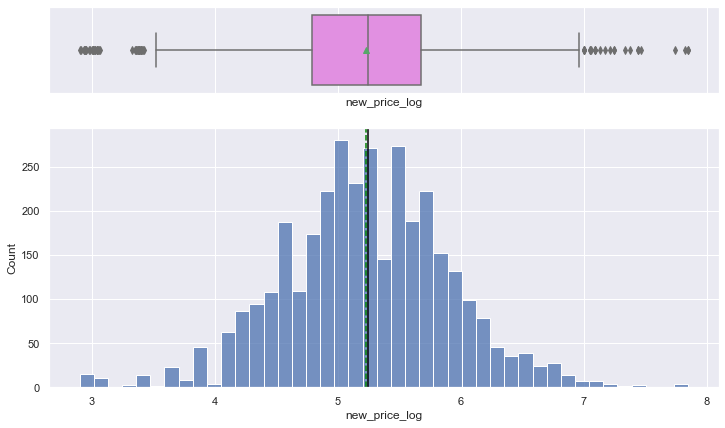

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(df, "new_price_log")

In [24]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()

<IPython.core.display.Javascript object>

### brand name

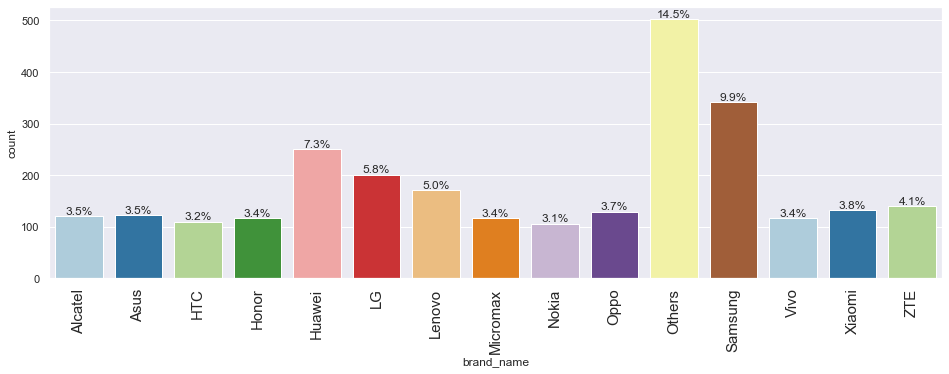

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(df, "brand_name", perc=True, n=15)

### Observations: 
- Most number of brands in the data are 'others' followed by Samsung and Huawei.

### os

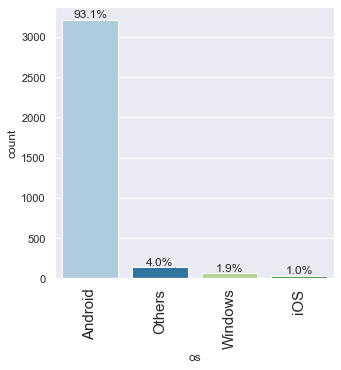

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(df, "os", perc=True)

### Observations: 
- The percentage of the used device market is dominated by Android devices by 93.1%.

### 4g

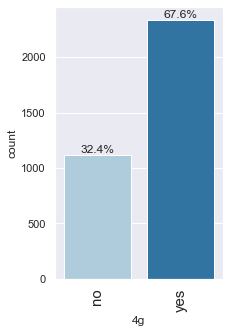

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(df, "4g", perc=True)

### Observations: 
- The percentage of phones with 4g is 67.6%.

### 5g

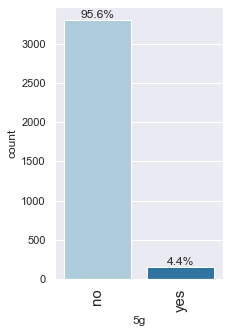

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(df, "5g", perc=True)

### Observations: 
- Only 4.4% of the phones have 5g.

### release year

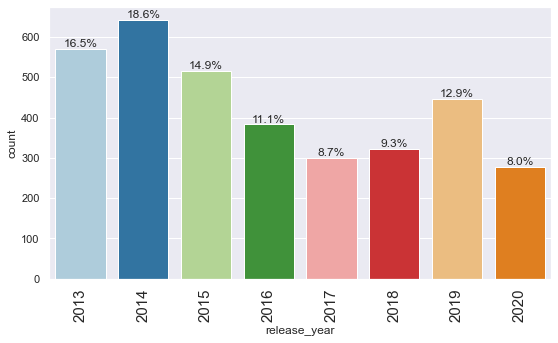

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(df, "release_year", perc=True)

### Observations: 
- The release year ranges between 2013 and 2020. In the given data, most of the phones released were in 2014.

### Bivariate Analysis

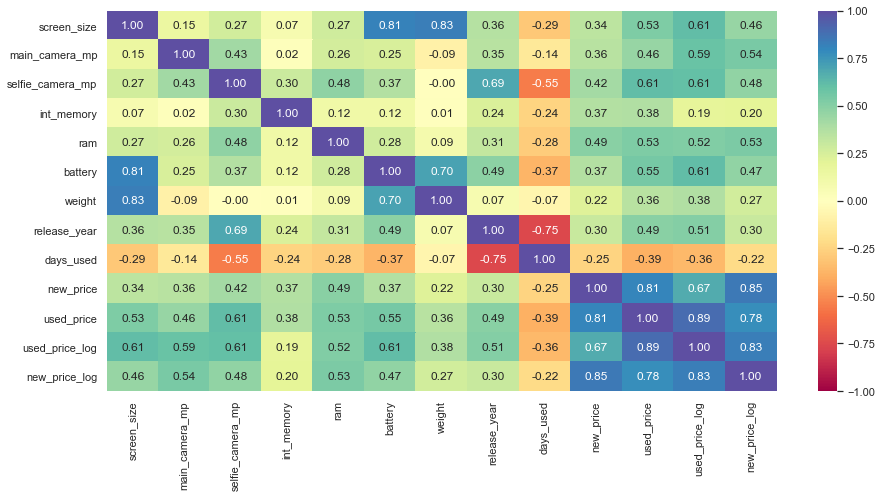

<IPython.core.display.Javascript object>

In [30]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observations: 
- Battery and weight are highly correlated with screen size.
- There is a negative corelation between release year and days used.
- The attributes that are relatively highly correlated with the price of used devices are selfie camera mp, screen size, ram and battery.

### Ram across brands

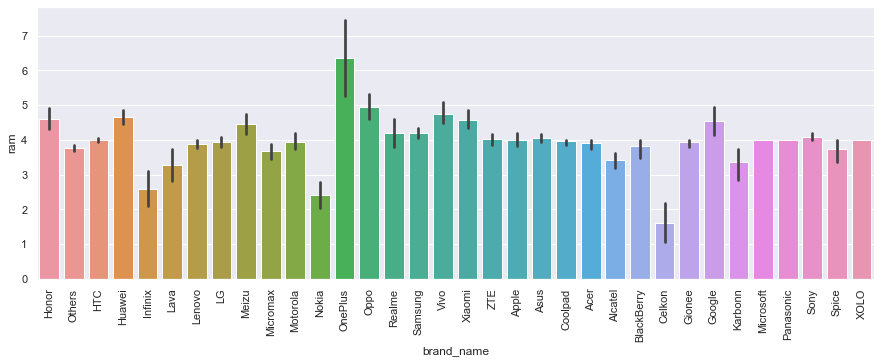

<IPython.core.display.Javascript object>

In [31]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

In [32]:
df.groupby("brand_name")["ram"].mean().sort_values(ascending=False)

brand_name
OnePlus       6.363636
Oppo          4.961240
Vivo          4.756410
Huawei        4.655378
Honor         4.603448
Xiaomi        4.583333
Google        4.533333
Meizu         4.451613
Samsung       4.199413
Realme        4.195122
Sony          4.069767
Asus          4.049180
ZTE           4.023214
HTC           4.000000
Apple         4.000000
XOLO          4.000000
Microsoft     4.000000
Panasonic     4.000000
Coolpad       3.954545
Motorola      3.943396
LG            3.936567
Gionee        3.933036
Acer          3.901961
Lenovo        3.885965
BlackBerry    3.829545
Others        3.777888
Spice         3.750000
Micromax      3.679487
Alcatel       3.407025
Karbonn       3.353448
Lava          3.277778
Infinix       2.600000
Nokia         2.420294
Celkon        1.613636
Name: ram, dtype: float64

<IPython.core.display.Javascript object>

### Observation:
- We observe that the amount of RAM varies with the brand - highest average being OnePlus and lowest being Celkon.

In [33]:
# creating a dataframe of devices with large battery
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 17)

<IPython.core.display.Javascript object>

In [34]:
df_large_battery.groupby("brand_name")["weight"].mean().sort_values(ascending=False)

brand_name
Google       517.000000
Lenovo       442.721429
Apple        439.558824
Sony         439.500000
HTC          425.000000
Samsung      398.352000
Huawei       394.486486
Others       390.546341
Alcatel      380.000000
LG           366.058333
Acer         360.000000
Nokia        318.000000
Asus         313.772727
Honor        248.714286
Xiaomi       231.500000
Gionee       209.430000
Motorola     200.757143
Realme       196.833333
Vivo         195.630769
ZTE          195.400000
Oppo         195.000000
Infinix      193.000000
Panasonic    182.000000
Spice        158.000000
Micromax     118.000000
Name: weight, dtype: float64

<IPython.core.display.Javascript object>

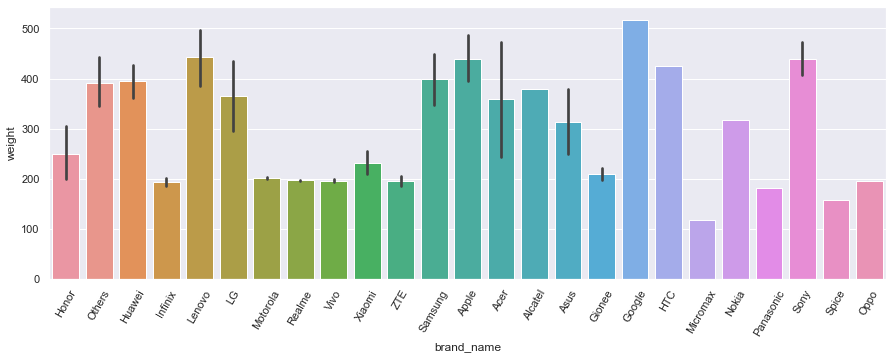

<IPython.core.display.Javascript object>

In [35]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df_large_battery, x="brand_name", y="weight")
plt.xticks(rotation=60)
plt.show()

### Observations: 
- The weight varies for phones and tablets offering large batteries (more than 4500 mAh) - Google being the highest with an average of 517gms and Micromax being the lowest with an average of 118gms.

In [36]:
# creating a dataframe of devices with large screen size
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 17)

<IPython.core.display.Javascript object>

In [37]:
df_large_screen.brand_name.value_counts()

Huawei       149
Samsung      119
Others        99
Vivo          80
Honor         72
Oppo          70
Xiaomi        69
Lenovo        69
LG            59
Motorola      42
Asus          41
Realme        40
Alcatel       26
Apple         24
Acer          19
Meizu         17
ZTE           17
OnePlus       16
Nokia         15
Sony          12
Infinix       10
HTC            7
Micromax       7
Google         4
XOLO           3
Coolpad        3
Gionee         3
Spice          2
Karbonn        2
Panasonic      2
Microsoft      1
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

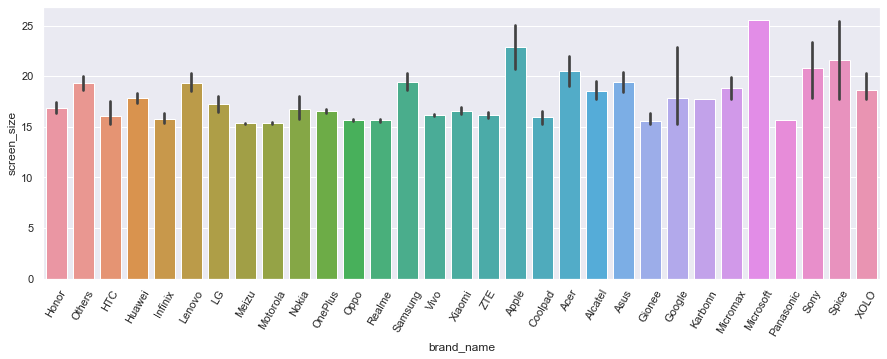

<IPython.core.display.Javascript object>

In [38]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df_large_screen, x="brand_name", y="screen_size")
plt.xticks(rotation=60)
plt.show()

### Observations: 
- 1099 phones and tablets are available across different brands with a screen size larger than 6 inches.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Feature engineering

In [39]:
# creating a new column device_category from the new_price column to tag devices as budget, mid-ranger, or premium.
df["device_category"] = pd.cut(
    x=df.new_price,
    bins=[-np.infty, 200, 350, np.infty],
    labels=["Budget", "Mid-ranger", "Premium"],
)
df["device_category"].value_counts()

Budget        1844
Mid-ranger    1025
Premium        585
Name: device_category, dtype: int64

<IPython.core.display.Javascript object>

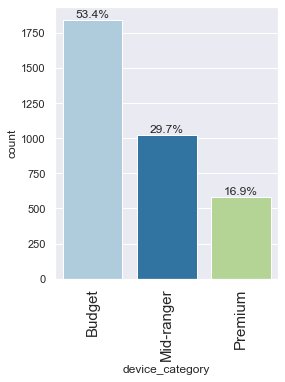

<IPython.core.display.Javascript object>

In [40]:
# creating labeled_barplot for 'device_category'
labeled_barplot(df, "device_category", perc=True)

In [41]:
## creating a new dataframe of devices which have better selfie cameras
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 18)

<IPython.core.display.Javascript object>

In [42]:
df_selfie_camera.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,used_price_log,new_price_log,device_category
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53,5.162097,5.519018,Mid-ranger
8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,200.32,132.43,4.886054,5.299916,Mid-ranger
12,Honor,Android,16.69,yes,yes,13.0,16.0,128.0,8.0,4100.0,206.0,2019,537,499.68,217.73,5.383256,6.213968,Premium
13,Honor,Android,15.32,yes,no,13.0,16.0,64.0,4.0,4000.0,171.5,2019,336,221.13,101.25,4.617593,5.398751,Mid-ranger
16,Honor,Android,15.90,yes,no,13.0,32.0,128.0,6.0,3750.0,172.0,2019,395,249.12,151.77,5.022366,5.517935,Mid-ranger


<IPython.core.display.Javascript object>

In [43]:
df_selfie_camera_budget = df_selfie_camera[
    df_selfie_camera["device_category"] == "Budget"
]

<IPython.core.display.Javascript object>

In [44]:
print(df_selfie_camera_budget.brand_name.unique())

['Honor' 'HTC' 'Huawei' 'Infinix' 'Lenovo' 'LG' 'Realme' 'Others' 'Vivo'
 'Xiaomi' 'ZTE' 'Coolpad' 'Asus' 'Meizu' 'Oppo' 'Panasonic' 'Samsung'
 'Sony' 'Motorola' 'Nokia']


<IPython.core.display.Javascript object>

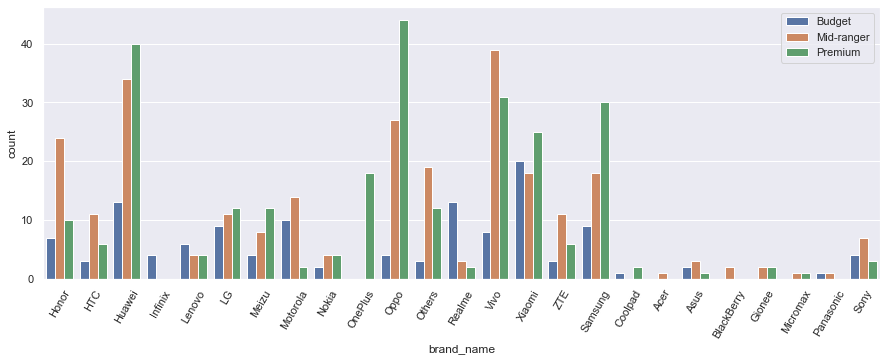

<IPython.core.display.Javascript object>

In [45]:
plt.figure(figsize=(15, 5))
sns.countplot(
    data=df_selfie_camera, x="brand_name", hue="device_category"
)  # creating countplot for 'brandname' with hue = 'device_category' on df_selfie_camera
plt.xticks(rotation=60)
plt.legend(loc=1)
plt.show()

### Observations: 
- The budget devices offering greater than 8MP selfie cameras across brands are Honor, HTC, Huawei, Infinix, Lenovo, LG, Realme, Others, Vivo, Xiaomi, ZTE, Coolpad, Asus, Meizu, Oppo, Panasonic, Samsung, Sony, Motorola, Nokia.

In [46]:
### creating a new dataframe of devices which have better main camera cameras
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 18)

<IPython.core.display.Javascript object>

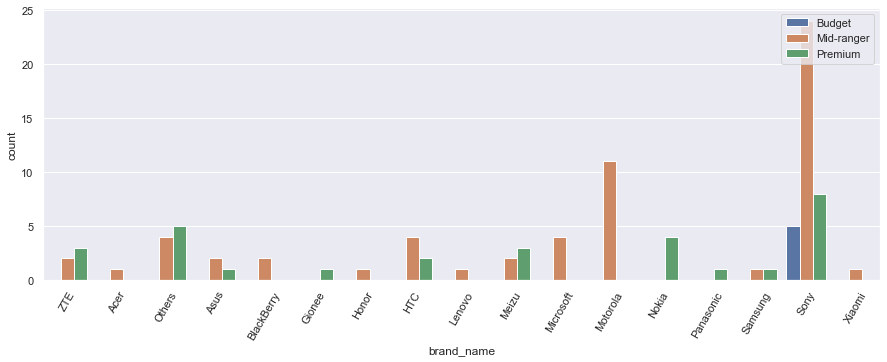

<IPython.core.display.Javascript object>

In [47]:
plt.figure(figsize=(15, 5))
sns.countplot(
    data=df_main_camera, x="brand_name", hue="device_category"
)  # creating countplot for 'brandname' with hue = 'device_category' on df_selfie_camera
plt.xticks(rotation=60)
plt.legend(loc=1)
plt.show()

### The price of used devices across the years

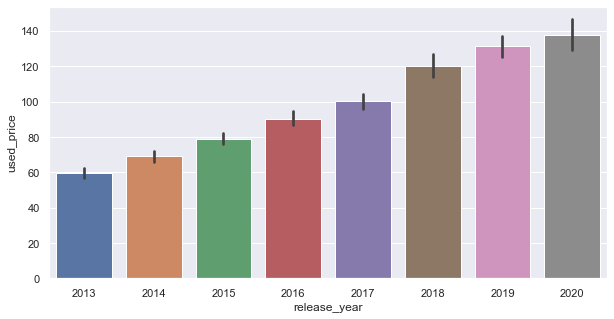

<IPython.core.display.Javascript object>

In [48]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df, x="release_year", y="used_price"
)  # creating barplot for release year and used price
plt.show()

### Checking the distribution of 4G and 5G devices wrt price segments


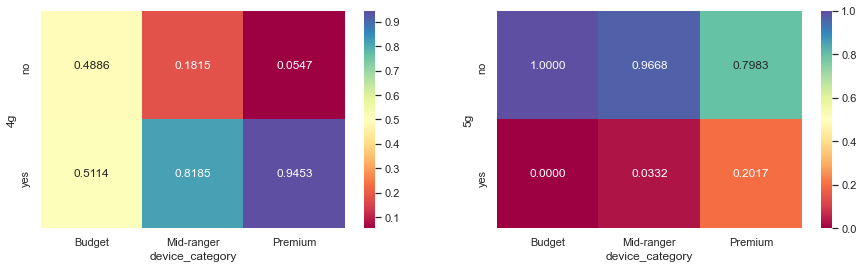

<IPython.core.display.Javascript object>

In [49]:
plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.heatmap(
    pd.crosstab(df["4g"], df["device_category"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral",
)

plt.subplot(122)
sns.heatmap(
    pd.crosstab(df["5g"], df["device_category"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral",
)
plt.show()

### Missing value treatment

In [50]:
## let's create a copy of the data
df1 = df.copy()

<IPython.core.display.Javascript object>

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3454 non-null   object  
 1   os                3454 non-null   object  
 2   screen_size       3454 non-null   float64 
 3   4g                3454 non-null   object  
 4   5g                3454 non-null   object  
 5   main_camera_mp    3275 non-null   float64 
 6   selfie_camera_mp  3452 non-null   float64 
 7   int_memory        3450 non-null   float64 
 8   ram               3450 non-null   float64 
 9   battery           3448 non-null   float64 
 10  weight            3447 non-null   float64 
 11  release_year      3454 non-null   int64   
 12  days_used         3454 non-null   int64   
 13  new_price         3454 non-null   float64 
 14  used_price        3454 non-null   float64 
 15  used_price_log    3454 non-null   float64 
 16  new_price_log     3454 n

<IPython.core.display.Javascript object>

In [52]:
# checking the missing values
df1.isnull().sum().sort_values(ascending=False)

main_camera_mp      179
weight                7
battery               6
int_memory            4
ram                   4
selfie_camera_mp      2
days_used             0
new_price_log         0
used_price_log        0
used_price            0
new_price             0
brand_name            0
release_year          0
os                    0
5g                    0
4g                    0
screen_size           0
device_category       0
dtype: int64

<IPython.core.display.Javascript object>

In [53]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1.groupby("brand_name")[col].transform(lambda x: x.fillna(x.median()))

<IPython.core.display.Javascript object>

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3454 non-null   object  
 1   os                3454 non-null   object  
 2   screen_size       3454 non-null   float64 
 3   4g                3454 non-null   object  
 4   5g                3454 non-null   object  
 5   main_camera_mp    3444 non-null   float64 
 6   selfie_camera_mp  3454 non-null   float64 
 7   int_memory        3454 non-null   float64 
 8   ram               3454 non-null   float64 
 9   battery           3454 non-null   float64 
 10  weight            3454 non-null   float64 
 11  release_year      3454 non-null   int64   
 12  days_used         3454 non-null   int64   
 13  new_price         3454 non-null   float64 
 14  used_price        3454 non-null   float64 
 15  used_price_log    3454 non-null   float64 
 16  new_price_log     3454 n

<IPython.core.display.Javascript object>

In [55]:
df1.isnull().sum().sort_values(ascending=False)

main_camera_mp      10
brand_name           0
weight               0
new_price_log        0
used_price_log       0
used_price           0
new_price            0
days_used            0
release_year         0
battery              0
os                   0
ram                  0
int_memory           0
selfie_camera_mp     0
5g                   0
4g                   0
screen_size          0
device_category      0
dtype: int64

<IPython.core.display.Javascript object>

In [56]:
# imputing the data with median for column main_camera_mp
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())
df1.isnull().sum().sort_values(ascending=False)

brand_name          0
os                  0
new_price_log       0
used_price_log      0
used_price          0
new_price           0
days_used           0
release_year        0
weight              0
battery             0
ram                 0
int_memory          0
selfie_camera_mp    0
main_camera_mp      0
5g                  0
4g                  0
screen_size         0
device_category     0
dtype: int64

<IPython.core.display.Javascript object>

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3454 non-null   object  
 1   os                3454 non-null   object  
 2   screen_size       3454 non-null   float64 
 3   4g                3454 non-null   object  
 4   5g                3454 non-null   object  
 5   main_camera_mp    3454 non-null   float64 
 6   selfie_camera_mp  3454 non-null   float64 
 7   int_memory        3454 non-null   float64 
 8   ram               3454 non-null   float64 
 9   battery           3454 non-null   float64 
 10  weight            3454 non-null   float64 
 11  release_year      3454 non-null   int64   
 12  days_used         3454 non-null   int64   
 13  new_price         3454 non-null   float64 
 14  used_price        3454 non-null   float64 
 15  used_price_log    3454 non-null   float64 
 16  new_price_log     3454 n

<IPython.core.display.Javascript object>

### Outlier Check
Let's check for outliers in the data.

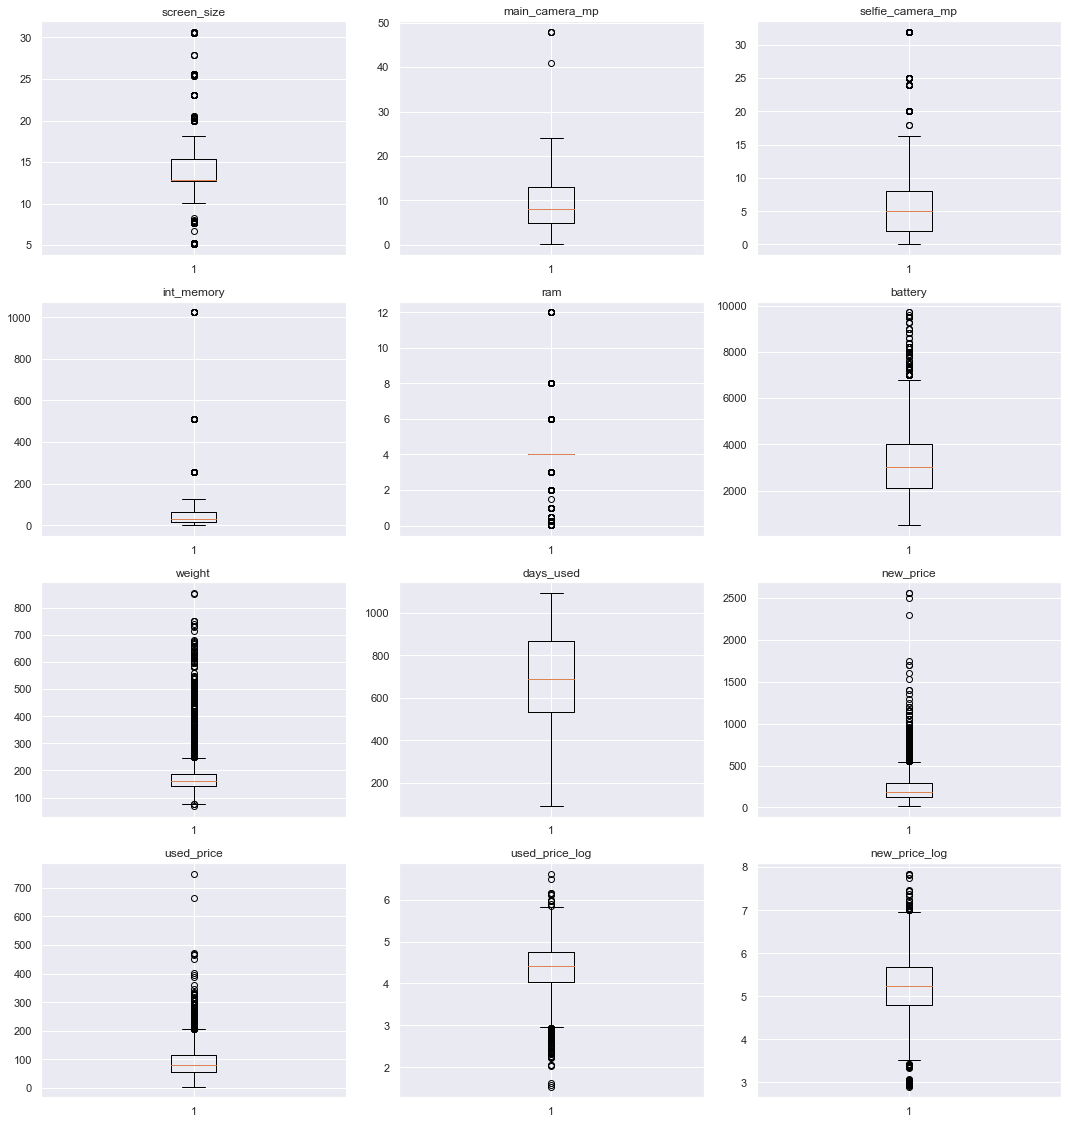

<IPython.core.display.Javascript object>

In [58]:
# outlier detection using boxplot
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("release_year")

plt.figure(figsize=(15, 35))

for i, variable in enumerate(numeric_columns):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

### Observations: 
- We observe that most of the numeric columns have discrete values like ram, screen size, main camera mp, etc.
Hence, we will proceed without treating outliers.

### Data Preparation for modeling
To predict the used device price, we will use the normalized version used_price_log for modeling.
Before we proceed to build a model, we'll have to encode categorical features.
We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [59]:
# defining the dependent and independent variables
X = df1.drop(
    ["new_price", "new_price_log", "used_price", "used_price_log", "device_category"],
    axis=1,
)
y = df1["used_price_log"]

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  days_used  
0               5.0        64.0  3.0   3020.0   146.0          2020        127  
1              16.0       128.0  8.0   4300.0   213.0          2020        325  
2               8.0       128.0  8.0   4200.0   213.0          2020        162  
3               8.0        64.0  6.0   7250.0   480.0          2020        345  
4               8.0        64.0  3.0   5000.0   185.0          2020        293  

0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: used_price_log, dtype: float64


<IPython.core.display.Javascript object>

In [60]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,brand_name_Alcatel,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,0,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,0,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,0,...,0,0,0,0,0,0,0,0,1,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,0,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,0,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [61]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [62]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

## Building a Linear Regression model

In [63]:
# adding constant to the train data
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmodel1 = sm.OLS(y_train, x_train1).fit()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     163.2
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        08:53:51   Log-Likelihood:                -382.90
No. Observations:                2417   AIC:                             861.8
Df Residuals:                    2369   BIC:                             1140.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    38.29

<IPython.core.display.Javascript object>

## Model performance evaluation

We will be using metric functions defined in sklearn for RMSE, MAE, and  𝑅2 .
We will define functions to calculate adjusted  𝑅2  and MAPE.
We will check the model performance on the actual prices and not the log values.
We will create a function that will convert the log prices to actual prices and then check the performance.

In [64]:
# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # computing the actual prices by using the exponential function
    target = np.exp(target)
    pred = np.exp(pred)

    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"RMSE": rmse, "MAE": mae, "MAPE": mape,}, index=[0],)

    return df_perf

<IPython.core.display.Javascript object>

In [65]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train1, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,MAPE
0,34.808534,19.631112,21.90038


<IPython.core.display.Javascript object>

In [66]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test1, y_test)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,MAPE
0,33.359492,19.600198,22.925606


<IPython.core.display.Javascript object>

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### We will be checking the following Linear Regression assumptions:
- No Multicollinearity
- Linearity of variables
- Independence of error terms
- Normality of error terms
- No Heteroscedasticity

### TEST FOR MULTICOLLINEARITY
We will test for multicollinearity using VIF.

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [68]:
vif1 = checking_vif(x_train1)
vif1

,feature,VIF
0,const,3.530219e+06
1,screen_size,7.575094e+00
2,main_camera_mp,1.967925e+00
3,selfie_camera_mp,2.714133e+00
4,int_memory,1.284152e+00
5,ram,2.127850e+00
6,battery,4.062888e+00
7,weight,6.390630e+00
8,release_year,4.572196e+00
9,days_used,2.658054e+00


<IPython.core.display.Javascript object>

In [69]:
vif2 = vif1[vif1["VIF"] > 5]
vif2

,feature,VIF
0,const,3.530219e+06
1,screen_size,7.575094e+00
7,weight,6.390630e+00
11,brand_name_Apple,1.298281e+01
20,brand_name_Huawei,5.983293e+00
33,brand_name_Others,9.710914e+00
36,brand_name_Samsung,7.509150e+00
45,os_iOS,1.178072e+01


<IPython.core.display.Javascript object>

### Removing Multicollinearity
To remove multicollinearity

Drop every column one by one that has a VIF score greater than 5 ignoring the dummy variables.
Look at the adjusted R-squared and RMSE of all these models.
Drop the variable that makes the least change in adjusted R-squared.
Check the VIF scores again.
Continue till you get all VIF scores under 5.
Let's define a function that will help us do this.

In [70]:
# Defining a function
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # emptying lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # building ols models by dropping one of the high VIF columns at a time
    # storing the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # creating the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [71]:
col_list = ["screen_size", "weight"]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight,0.754547,0.289239
1,screen_size,0.751007,0.291317


<IPython.core.display.Javascript object>

In [72]:
col_to_drop = "weight"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Checking VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


,feature,VIF
0,const,3.387555e+06
1,screen_size,3.445161e+00
2,main_camera_mp,1.882425e+00
3,selfie_camera_mp,2.692704e+00
4,int_memory,1.284143e+00
5,ram,2.126677e+00
6,battery,3.656326e+00
7,release_year,4.384300e+00
8,days_used,2.646354e+00
9,brand_name_Alcatel,3.403801e+00


<IPython.core.display.Javascript object>

We observe that for all columns (ignoring the dummy variables), the VIF is less than 5 which is desirable. Hence, we will proceed further.

### Dropping high p-value variables
We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
Instead, we will do the following:
Build a model, check the p-values of the variables, and drop the column with the highest p-value.
Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
Repeat the above two steps till there are no columns with p-value > 0.05.
We will do that by using a loop which will be more efficient.

In [73]:
# initial list of columns excluding dummy variables
cols = x_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'release_year', 'brand_name_Apple', 'brand_name_Asus', 'brand_name_Celkon', 'brand_name_Gionee', 'brand_name_Google', 'brand_name_HTC', 'brand_name_LG', 'brand_name_Micromax', 'brand_name_Motorola', 'brand_name_Nokia', 'brand_name_OnePlus', 'brand_name_Oppo', 'brand_name_Realme', 'brand_name_Samsung', 'brand_name_Spice', 'os_Others', '4g_yes']


<IPython.core.display.Javascript object>

### Observation:
- All these columns have p-value < 0.05 and rest of them are dropped.

In [74]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

<IPython.core.display.Javascript object>

In [75]:
olsmodel2 = sm.OLS(y_train, x_train3).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     311.3
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        08:53:53   Log-Likelihood:                -416.17
No. Observations:                2417   AIC:                             882.3
Df Residuals:                    2392   BIC:                             1027.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  57.2557    

<IPython.core.display.Javascript object>

In [76]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,MAPE
0,34.606336,19.821793,22.207305


<IPython.core.display.Javascript object>

In [77]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test)
olsmodel2_test_perf

Test Performance



,RMSE,MAE,MAPE
0,33.481667,19.728497,23.211613


<IPython.core.display.Javascript object>

### Now we'll check the rest of the assumptions on olsmod2.

- Linearity of variables
- Independence of error terms
- Normality of error terms
- No Heteroscedasticity

In [78]:
# creating a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = "y_train"
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,NaN,3.855605,0.231883
1525,NaN,4.593043,-0.144643
1128,NaN,4.281739,0.033614
3003,NaN,4.252313,0.029755
2907,NaN,4.600531,-0.144093


<IPython.core.display.Javascript object>

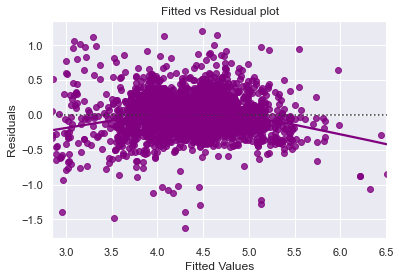

<IPython.core.display.Javascript object>

In [79]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()


**Observations**

- We see no pattern in the plot above.
- Hence, the assumptions of linearity and independence are satisfied.

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.

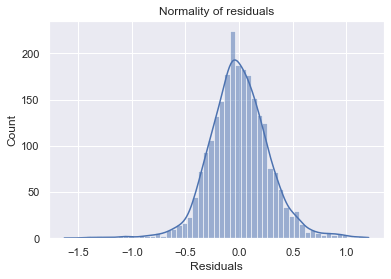

<IPython.core.display.Javascript object>

In [80]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

**Observations**

- The histogram of residuals almost has a bell shape structure.
- Let's check the Q-Q plot.

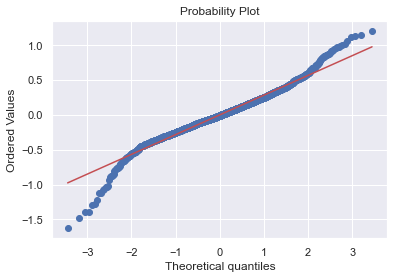

<IPython.core.display.Javascript object>

In [81]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

**Observations**

- The residuals almost follow a straight line.
- Let's check the results of the Shapiro-Wilk test.

In [82]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9717509150505066, pvalue=1.9626431191308292e-21)

<IPython.core.display.Javascript object>

**Observations**

* Since p-value < 0.05, the residuals are not normal as per shapiro test.
* Strictly speaking - the residuals are not normal. However, as an approximation, we might be willing to accept this distribution as close to being normal

### TEST FOR HOMOSCEDASTICITY
- We will test for homoscedasticity by using the goldfeldquandt test.

In [83]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0633258339861744), ('p-value', 0.14551237985803908)]

<IPython.core.display.Javascript object>

**Observations**

- Since p-value > 0.05, the residuals are homoscedastic.
- So, the assumption is satisfied.

All the assumptions of linear regression are satisfied. Let's rebuild our final model, check its performance, and draw inferences from it.

## Final Model Summary

In [84]:
olsmodel_final = sm.OLS(y_train, x_train3).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     311.3
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        08:53:57   Log-Likelihood:                -416.17
No. Observations:                2417   AIC:                             882.3
Df Residuals:                    2392   BIC:                             1027.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  57.2557    

<IPython.core.display.Javascript object>

In [85]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train3, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,MAPE
0,34.606336,19.821793,22.207305


<IPython.core.display.Javascript object>

In [86]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test3, y_test)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,MAPE
0,33.481667,19.728497,23.211613


<IPython.core.display.Javascript object>

* We can see that RMSE on the train and test sets are comparable. So, our model is not suffering from overfitting.
* MAE indicates that our current model is able to predict used price with a very small error.
* Hence, we can conclude the model "olsmodel_final" is good for prediction as well as inference purposes.

### Model inferences:
- A unit increase in main_camera_mp, selfie_camera_mp, int_memory, ram, screen size increases the used price, all other variables held constant.
- A unit increase in brand names like Apple, Samsung, Nokia, Asus, One plus, Google increases the used price, all other variables held constant.
- A unit increase in 4g_yes increases the used price, all other variables held constant.
- A unit increase in brand names like Celkon, Micromax, Motorola, Realme, Spice decreases the used price, all other variables held constant.
- A unit increase in os_others decreases the used price, all other variables held constant.

### Actionable Insights and Recommendations

The factors that influence the price of used devices are as follows:
- Brand names such as Apple, Samsung, Nokia, Asus, One plus, Google are priced higher.
- Certain features like screen size, memory, camera, ram contribute to higher pricing.
- 4g has a positive impact on pricing.
- Older the phones, the pricing is lower.

### Business Recommendations are as follows:
- Focus on popular brands in order to have more sales and hence profits.
- Invest in newer phones for better results.
- Explore the aspect of features of phones as they are responsible for higher pricing. These features could be highlighted in the listing of devices on sale.
